In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

### $\rho _ { \pm } ( \mathbf { x } ) = \rho _ { 0 } \exp \left[ \pm \frac { q _ { e } \phi ( \mathbf { x } ) } { k _ { B } T } \right]$

### $\nabla ^ { 2 } \phi ( \mathbf { x } ) = - \frac { 1 } { \epsilon } \left[ Z q _ { e } \delta ( \mathbf { x } ) + q _ { e } \left[ \rho _ { + } ( \mathbf { x } ) - \rho _ { - } ( \mathbf { x } ) \right] \right]$

### $\nabla ^ { 2 } \phi ( \mathbf { x } ) + \frac { 1 } { \lambda ^ { 2 } } \phi ( \mathbf { x } ) = \frac { 1 } { \epsilon } Z q _ { e } \delta ( \mathbf { x } )$

In [73]:
ro = 100  #mM
kBT = 4.11*10**-21  #J at rt
qe = 1.6021*10**-19  #electron charge Coulumbs
z = 1  #one charge...
eps = 80*10**-22  #dielectric constant of water...

In [74]:
###length scale
lamb = qe*np.sqrt(kBT/(2*ro))

In [75]:
###initial conditions, at r==lambda
ph1 = qe*z/(4*np.pi*eps*lamb)*np.exp(-1)
ph2 = 1/(4*np.pi*eps)*(-1/lamb**2 * np.exp(-1) - 1/(lamb**2)*np.exp(-1))
rs = np.linspace(-0,10**-5,100)
dr = rs[1]-rs[0]

d1 = np.zeros(len(rs))  #phi
d2 = np.zeros(len(rs))  #dphi/dr

for ri in range(0,len(rs)-1):
    d1[ri+1] = d1[ri] + dr*d2[ri]
    rr = rs[ri]+lamb
    d2[ri+1] = d2[ri] + dr*(-2/rr*d2[ri] + np.sinh(qe*d1[ri]/kBT) + 2*qe*ro/eps)

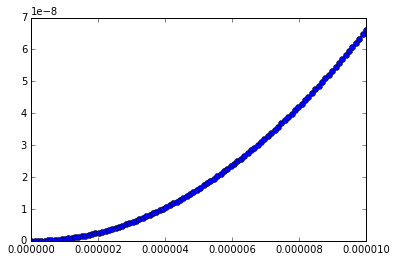

In [76]:
plt.plot(rs,d1,'-o')